<a href="https://colab.research.google.com/github/juampa795/Data_Science/blob/main/Visualizaciones_Morales_Juan_Pablo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Segunda Entrega: Visualizaciones

Se utilizará para este proyecto la 1era opción de Dataset: Modelo de salida de clientes. El mismo presenta información que nos permitirá determinar el grado en que nuestros clientes dejan de utilizar nuestros productos bancarios. La salida de clientes representa para el banco una perdida de ingresos y del market share. Tambien los clientes que el banco pierde, pueden generar una reputación negativa.

In [2]:
import pandas as pd
url = 'https://raw.githubusercontent.com/juampa795/Data_Science/main/Churn_Modelling.csv'
df = pd.read_csv(url, index_col=0)

df  

,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
RowNumber,,,,,,,,,,,,,
1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9996,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9997,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9998,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1


In [11]:
df.info() #no hay valores nulos en nuestro dataset

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10000 entries, 1 to 10000
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CustomerId       10000 non-null  int64  
 1   Surname          10000 non-null  object 
 2   CreditScore      10000 non-null  int64  
 3   Geography        10000 non-null  object 
 4   Gender           10000 non-null  object 
 5   Age              10000 non-null  int64  
 6   Tenure           10000 non-null  int64  
 7   Balance          10000 non-null  float64
 8   NumOfProducts    10000 non-null  int64  
 9   HasCrCard        10000 non-null  int64  
 10  IsActiveMember   10000 non-null  int64  
 11  EstimatedSalary  10000 non-null  float64
 12  Exited           10000 non-null  int64  
dtypes: float64(2), int64(8), object(3)
memory usage: 1.1+ MB


## Gráficos con Matplotlib

In [3]:
#Importando libreria de Matlplotlib
import matplotlib as mp
import matplotlib.pyplot as plt
#mp.style.use ('bmh')  cuando quiera cambiar los stilos

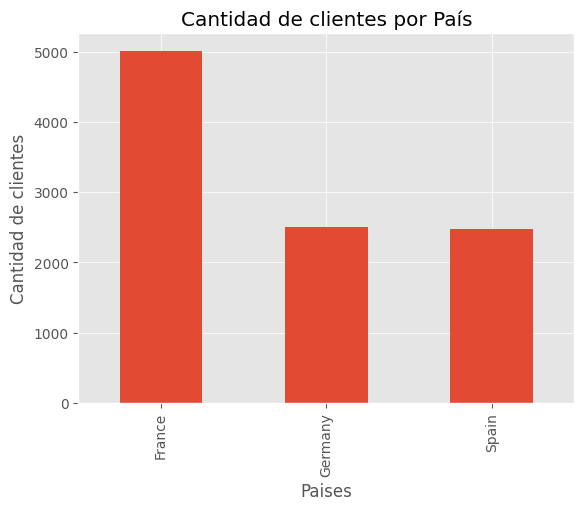

In [19]:
#value_counts() Cuenta la cantidad de veces que se repite cada uno de los paises
geo_count = df['Geography'].value_counts() #Defino la variable contar por Pais
geo_count.plot(kind = 'bar')
plt.title('Cantidad de clientes por País')
plt.xlabel('Paises')
plt.ylabel('Cantidad de clientes')
mp.style.use('ggplot')

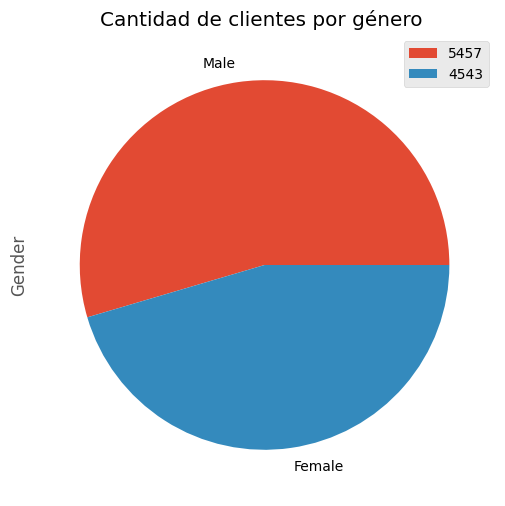

In [17]:
gender_count = df['Gender'].value_counts() #Defino variable Contar por Genero
gender_count.plot(kind = 'pie', figsize = (14,6))
plt.title('Cantidad de clientes por género ')
plt.legend(df['Gender'].value_counts(), loc='upper right')
mp.style.use('bmh')

In [12]:
df['Exited']==0 #Arroja True si Exited=0, es decir el cliente no se va del banco

RowNumber
1        False
2         True
3        False
4         True
5         True
         ...  
9996      True
9997      True
9998     False
9999     False
10000     True
Name: Exited, Length: 10000, dtype: bool

In [13]:
df['Exited']==1 #Arroja True si Exited=1, es decir el cliente se va del banco

RowNumber
1         True
2        False
3         True
4        False
5        False
         ...  
9996     False
9997     False
9998      True
9999      True
10000    False
Name: Exited, Length: 10000, dtype: bool

In [6]:
df[df['Exited']==0].Age #Si df['Exited]==0 es falso, no se fue del banco y quiero que me diga la edad del cliente

RowNumber
2        41
4        39
5        43
7        50
9        44
         ..
9994     28
9995     29
9996     39
9997     35
10000    28
Name: Age, Length: 7963, dtype: int64

In [7]:
df[df['Exited']==1].Age #Si df['Exited]==1 es falso, se fue del banco y quiero que me diga la edad

RowNumber
1       42
3       42
6       44
8       29
17      58
        ..
9982    42
9983    46
9992    53
9998    36
9999    42
Name: Age, Length: 2037, dtype: int64

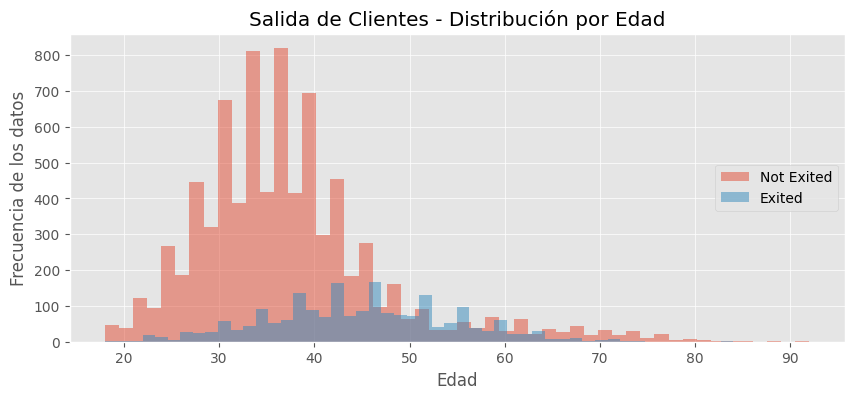

In [20]:
plt.figure(figsize=(10,4))
plt.hist(df[df['Exited']==0].Age, bins=50, alpha=0.5, label='Not Exited') #grafico la distribución de quienes no abandonaron el banco. Bins lo uso para agrupar
plt.hist(df[df['Exited']==1].Age, bins=50, alpha=0.5, label='Exited') #grafico la distribución de quines si abandonaron el banco
plt.title('Salida de Clientes - Distribución por Edad')
plt.xlabel('Edad')
plt.ylabel('Frecuencia de los datos')
plt.legend(loc='center right')
mp.style.use('bmh')

## Gráficos son Seaborn

In [15]:
import seaborn as sns

[Text(0.5, 0, 'Salida de Clientes'),
 Text(0, 0.5, 'Numero de Clientes'),
 Text(0.5, 1.0, 'Distribución Salida Clientes Por Sexo')]

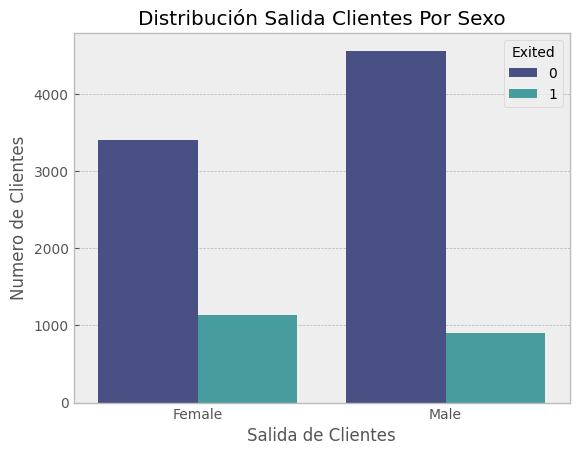

In [56]:
ax = sns.countplot(x = 'Gender', hue = 'Exited',data = df, palette = 'mako')
ax.set(xlabel = 'Salida de Clientes', ylabel = 'Numero de Clientes', title = 'Distribución Salida Clientes Por Sexo')

In [27]:
#Quiero graficar la cantidad de clientes de perdi y aquellos que aun no dejan el banco
exit_count = df['Exited'].value_counts()
exit_count

0    7963
1    2037
Name: Exited, dtype: int64

In [32]:
exit_count/len(df)*100

0    79.63
1    20.37
Name: Exited, dtype: float64

([<matplotlib.axis.XTick at 0x7f7fbd4f02e0>,
 [Text(0, 0, 'Not Exited'), Text(1, 0, 'Exited')])

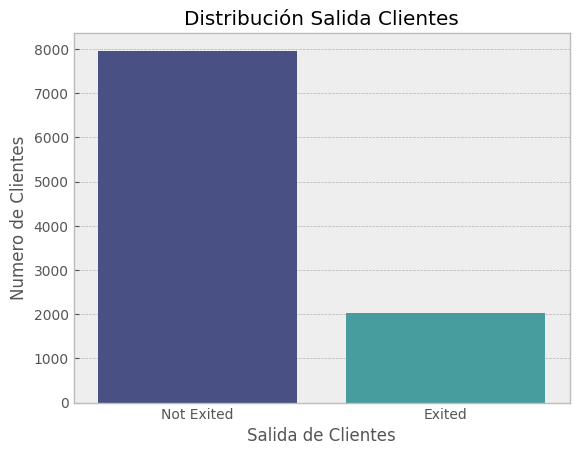

In [51]:
ax = sns.barplot(x = exit_count.index, y = exit_count.values, palette = 'mako')
ax.set(xlabel = 'Salida de Clientes', ylabel = 'Numero de Clientes', title = 'Distribución Salida Clientes')
plt.xticks([0, 1], ['Not Exited', 'Exited'])

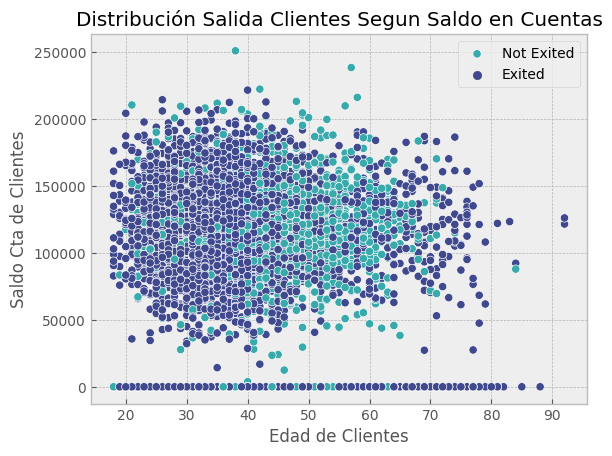

In [80]:
ax = sns.scatterplot(data = df, x = 'Age', y = 'Balance', hue = 'Exited', palette = 'mako')
ax.set(xlabel = 'Edad de Clientes', ylabel = 'Saldo Cta de Clientes', title = 'Distribución Salida Clientes Segun Saldo en Cuentas')
plt.legend(['Not Exited', 'Exited'], loc='upper right')

In [83]:
#Porcentaje de salida de los clientes
exit_perc = round(exit_count/ len(df) * 100, 1) #le pido que redondee el número con un solo decimal
exit_perc

0    79.6
1    20.4
Name: Exited, dtype: float64